# Python notebook to reproduce _Supplementary Figure 4_

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import plot_settings
import plot_utils

In [2]:
fig_dir = 'supplementary/figure_4/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [3]:
df = pd.read_csv('results/LINCS/processed_dataset_statistics.csv')
additional_mapping = {
    'ABT-263': 'Navitoclax',
    'ABT-869': 'Linifanib',
    'AC220': 'Quizartinib',
    'AG-014699': 'Rucaparib Phosphate',
    'AICAR': 'Acadesine',
    'AMG-706': 'Motesanib',
    'AP-24534': 'Ponatinib',
    'AS601245': 'AS-601245',
    'AS605240': 'AS-605240',
    'AUY922': 'Luminespib',
    'AV-951': 'Tivozanib',
    'AZ628': 'AZ-628',
    'AZD-0530': 'Saracatinib',
    'AZD6244': 'Selumetinib',
    'AZD6482': 'AZD-6482',
    'AZD7762': 'AZD-7762',
    'AZD8055': 'AZD-8055',
    'BAY 61-3606': 'BAY-61-3606',
    'BIRB 0796': 'Doramapimod',
    'BIX02189': 'BIX-02189',
    'BMN-673': 'Talazoparib',
    'BMS-708163': 'Avagacestat',
    'CAL-101': 'Idelalisib',
    'CCT018159': 'CCT-018159',
    'CEP-701': 'Lestaurtinib',
    'CH5424802': 'Alectinib',
    'CP466722': 'CP-466722',
    'CP724714': 'CP-724714',
    'EKB-569': 'Pelitinib',
    'FH535': 'FH-535',
    'FK866': 'Daporinad',
    'GDC0941': 'GDC-0941',
    'GDC0941 (RESCREEN)': 'GDC-0941',
    'GSK1070916': 'GSK-1070916',
    'GSK2126458': 'GSK-2126458',
    'GSK429286A': 'GSK429286-A',
    'GSK690693': 'GSK-690693',
    'GW 441756': 'GW-441756',
    'GW843682X': 'GW-843682X',
    'JNJ-26854165': 'Serdemetan',
    'LAQ824': 'Dacinostat',
    'LY317615': 'Enzastaurin',
    'MLN4924': 'Pevonedistat',
    'MP470': 'Amuvatinib',
    'MS-275': 'Entinostat',
    'PD-0332991': 'Palbociclib',
    'PLX4720': 'PLX-4720', 
    'PLX4720 (RESCREEN)': 'PLX-4720',
    'QS11': 'QS-11',
    'RDEA119': 'Refametinib',
    'RDEA119 (RESCREEN)': 'Refametinib',
    'SB 216763': 'SB-216763',
    'SB-715992': 'Ispinesib',
    'SB590885': 'SB-590885',
    'SGC0946': 'SGC-0946',
    'SL 0101-1': 'SL-0101-1',
    'T0901317': 'T-0901317',
    'TG101348': 'Fedratinib',
    'TGX221': 'TGX-221',
    'TW 37': 'TW-37',
    'UNC0638': 'UNC-0638',
    'UNC1215': 'UNC-1215',
    'VX-680': 'Tozasertib',
    'WZ3105': 'WZ-3105',
    'XAV 939': 'XAV-939',
    'XL-184': 'Cabozantinib',
    'XL-880': 'Foretinib',
    'XMD8-85': 'Erk-5-in-1',
    'YM155': 'YM-155',
    'YM201636': 'YM-201636',
    'Z-LLNLE-CHO': 'Gamma-Secretase Inhibitor I',
    'ZSTK474': 'ZSTK-474',
    'AFATINIB (RESCREEN)': 'AFATINIB',
}
rev_additional_mapping = {additional_mapping[k]: k for k in additional_mapping}

translation_file = 'results/LINCS/compoundinfo_beta.txt'

alias_mapping = {}
reverse_alias_mapping = {}
with open(translation_file, 'r') as f:
    for idx, line in enumerate(f.readlines()):
        if idx == 0:
            continue  # header
        info = line.strip().split('\t')
        broad_id = info[0]
        cmap_name = info[1]
        other_aliases = info[6]
        
        alias_mapping[broad_id] = {cmap_name, *other_aliases}
        if cmap_name != broad_id:
            reverse_alias_mapping[cmap_name.upper()] = broad_id
        for al in other_aliases:
            if al != broad_id:
                reverse_alias_mapping[al.upper()] = broad_id

In [4]:
def get_general_drug(broad_drug):
    aliases = alias_mapping[broad_drug]
    for opt in aliases:
        if opt.upper() in additional_mapping:
            opt = additional_mapping[opt.upper()]
        if opt.upper() in reverse_alias_mapping and reverse_alias_mapping[opt.upper()] == broad_drug:
            return opt.upper()
    return None

In [5]:
translated_drugs = [get_general_drug(dr) for dr in df['drug_id'].tolist()]
cell_lines = df['cell_id'].tolist()

# Code to reproduce Supplementary Figure 4a-b

Supplementary Fig. 4a

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


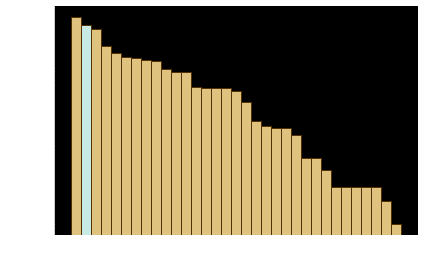

In [6]:
%matplotlib inline

cell_line_counts = {cl: len([x for x in cell_lines if x == cl]) for cl in np.unique(cell_lines)}
sorted_cls = sorted(list(cell_line_counts.keys()), key=lambda cl: -cell_line_counts[cl])

ax = plot_settings.get_wider_axis()

bcolor = plot_settings.get_sag_vs_baseline_colors('baseline')
emph_color = plot_settings.get_sag_vs_baseline_colors('Sagittarius')
ecolor = plot_settings.get_model_colors('cvae')

plot_utils.sorted_histogram(
    ax, cell_lines, sorted_cls, 'Cell line', 'Count in LINCS dataset',
    call_out_labels=['A549'], base_color=bcolor, call_out_color=emph_color,
    edge_color=ecolor, yscale='log', anchor='center')
plot_utils.format_ax(ax)
plt.tight_layout()
plt.savefig(fig_dir + 'figure_4a.pdf')

Supplementary Fig. 4b

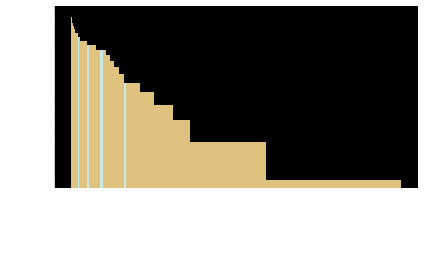

In [7]:
drug_counts = {dr: len([x for x in translated_drugs if x is not None and x.upper() == dr.upper()]) 
               for dr in set(translated_drugs) if dr is not None}
sorted_drgs = sorted(list(drug_counts.keys()), key=lambda dr: -drug_counts[dr])

ax = plot_settings.get_wider_axis()
plot_utils.sorted_histogram(
    ax, [dr for dr in translated_drugs if dr is not None], sorted_drgs, 'Drug', 
    'Count in LINCS dataset', base_color=bcolor,
    call_out_labels=['Bosutinib', 'Selumetinib', 'Vismodegib', 'Olaparib'],
    call_out_color=emph_color, rotangle=-45, anchor='left', add_padding=2, edge_color=None,
    edge_width=0.0, yscale='log')
plot_utils.format_ax(ax)
plt.tight_layout()
plt.savefig(fig_dir + 'figure_4b.pdf')